# Modelo de Previsão de vendas com o modelo XGBoost - E-commerce Brasileiro

Link original para o dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

 Neste projeto, utilizamos a base de dados pública da Olist, um dos principais marketplaces do Brasil, para desenvolver um modelo preditivo de vendas com o algoritmo XGBoost. O conjunto de bases inicial contém diversos arquivos com variadas informações sobre pedidos, produtos, categorias, avaliações, localização geográfica e outros fatores que permitem uma análise aprofundada. Com isso, objetivo é construir uma base de dados com informações relevantes a fim de construir um modelo para prever a quantidade de produtos vendidos em um período futuro. Em um cenário real, soluções como essa podem auxiliar empresas a antecipar demandas, otimizar estoques e identificar padrões de comportamento de compra, contribuindo para uma gestão mais eficiente e orientada por dados.

 O resumo detalhado do projeto encontra-se no arquivo readme do repositório deste projeto.

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├── Mall_Customers.csv
├── notebooks
│   └── projeto_supermercado_01_eda.ipynb
│   └── ...
├── reports
│   └── ...
```

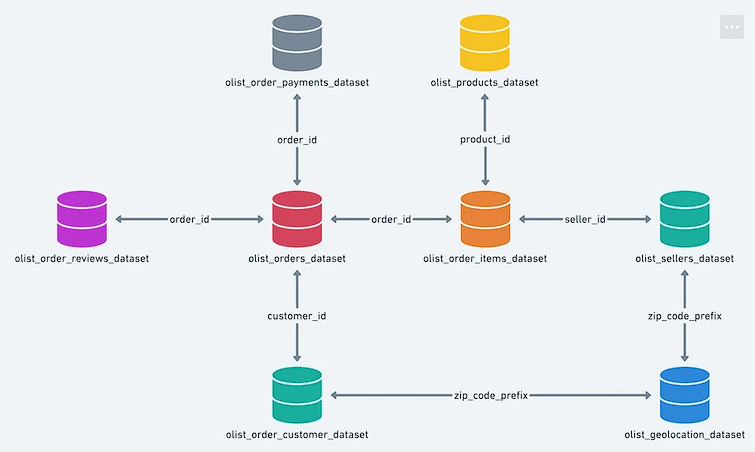

In [1]:
# Importando as bibliotecas
import pandas as pd

In [2]:
# Carregar os dataset
path_customers = r"../data/olist_customers_dataset.csv"
path_geo = r"../data/olist_geolocation_dataset.csv"
path_order_items = r"../data/olist_order_items_dataset.csv"
path_payments = r"../data/olist_order_payments_dataset.csv"
path_reviews = r"../data/olist_order_reviews_dataset.csv"
path_orders = r"../data/olist_orders_dataset.csv"
path_products = r"../data/olist_products_dataset.csv"
path_sellers = r"../data/olist_sellers_dataset.csv"
path_cat_name = r"../data/product_category_name_translation.csv"

In [3]:
# Carregando o dataset de order items
df_order_items = pd.read_csv(path_order_items)
df_order_items.info()
df_order_items.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [4]:
# Avaliando o pedido com maior número de pordutos
df_order_items.loc[df_order_items['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [5]:
# Criando a base de dados primária - quantos produtos foram comprados em cada ordem de compra
sales_01 = df_order_items[['order_id', 'product_id', 'order_item_id', 'price']].groupby(by=['order_id', 'product_id'], as_index = False).agg({'order_item_id' : 'count', 'price' : 'max'})


# Renomeando as coluna de 'order_item_id' e 'price'
sales_01 = sales_01.rename(columns={'order_item_id' : 'order_units', 'price':'unit_price'})


# Verificando a transformação com a order_id com o maior número de produtos
sales_01.loc[sales_01['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']


,order_id,product_id,order_units,unit_price
52027,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,10,1.2
52028,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,10,1.2
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,1,7.8


In [6]:
# Carregando o dataset de ordens
df_orders = pd.read_csv(path_orders)
df_orders.info()
df_orders.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [7]:
# Avaliando a coluna de order_status
(df_orders['order_status'].value_counts()/99441)*100

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: count, dtype: float64

- Como o objetivo é fazer o forecast de vendas, serão considerados somente pedidos finalizados, que representam mais de 97% dos dados

In [8]:
# Filtrando somente os registros de pedidos entregues
df_orders = df_orders.loc[df_orders['order_status'] == 'delivered']

# Visualizando novamente as informações da base de dados
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [9]:
# Avaliando os registros nulos da base de dados
df_orders.loc[(df_orders['order_approved_at'].isnull() == True) + (df_orders['order_delivered_carrier_date'].isnull() == True) + (df_orders['order_delivered_customer_date'].isnull() == True)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00


- Foi escolhido para o problema considerar a data da compra com sendo a data de colocação do pedido. Portanto, as colunas com valores nulos será ignoradas

In [10]:
# Incluindo a data da venda e o zip code na base principal
sales_02 = pd.merge(sales_01, df_orders[['order_id', 'customer_id', 'order_purchase_timestamp']], on='order_id', how='right')

# Visualizando as informações da base
sales_02.info()

# Visaulizando a base
sales_02.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100196 entries, 0 to 100195
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  100196 non-null  object 
 1   product_id                100196 non-null  object 
 2   order_units               100196 non-null  int64  
 3   unit_price                100196 non-null  float64
 4   customer_id               100196 non-null  object 
 5   order_purchase_timestamp  100196 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


,order_id,product_id,order_units,unit_price,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,1,29.99,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,1,118.70,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37


In [11]:
# Avaliando a base de clientes
df_customers = pd.read_csv(path_customers)
df_customers.info()
df_customers.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [12]:
# Incluindo o cep na base principal
sales_03 = pd.merge(sales_02, df_customers[['customer_id', 'customer_zip_code_prefix', 'customer_state']], on='customer_id', how='left')

# Visualizando as informações da base
sales_03.info()

# Visaulizando a base
sales_03.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100196 entries, 0 to 100195
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  100196 non-null  object 
 1   product_id                100196 non-null  object 
 2   order_units               100196 non-null  int64  
 3   unit_price                100196 non-null  float64
 4   customer_id               100196 non-null  object 
 5   order_purchase_timestamp  100196 non-null  object 
 6   customer_zip_code_prefix  100196 non-null  int64  
 7   customer_state            100196 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


,order_id,product_id,order_units,unit_price,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,1,29.99,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,SP
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,1,118.70,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,47813,BA


In [13]:
# Verificando a integridade das informações novamente com a ordem com maior número de itens
sales_03.loc[sales_03['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,product_id,order_units,unit_price,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_state
89470,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,10,1.2,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-16 18:19:25,5882,SP
89471,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,10,1.2,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-16 18:19:25,5882,SP
89472,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,1,7.8,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-16 18:19:25,5882,SP


In [14]:
# Avaliando a base de clientes
df_products = pd.read_csv(path_products)
df_products.info()
df_products.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [15]:
# Incluindo as informações do produto na base principal
sales_04 = pd.merge(sales_03, df_products[['product_id', 'product_category_name', 'product_description_lenght']], on='product_id', how='left')

# Visualizando as informações da base
sales_04.info()

# Visaulizando a base
sales_04.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100196 entries, 0 to 100195
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    100196 non-null  object 
 1   product_id                  100196 non-null  object 
 2   order_units                 100196 non-null  int64  
 3   unit_price                  100196 non-null  float64
 4   customer_id                 100196 non-null  object 
 5   order_purchase_timestamp    100196 non-null  object 
 6   customer_zip_code_prefix    100196 non-null  int64  
 7   customer_state              100196 non-null  object 
 8   product_category_name       98795 non-null   object 
 9   product_description_lenght  98795 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


,order_id,product_id,order_units,unit_price,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_state,product_category_name,product_description_lenght
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,1,29.99,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3149,SP,utilidades_domesticas,268.0
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,1,118.70,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,47813,BA,perfumaria,178.0


In [16]:
# Organizando a base de dados para salvamento
sales_04 = sales_04.rename(columns={'order_purchase_timestamp':'sale_date', 'customer_zip_code_prefix':'zip_code_prefix'})
columns_order = ['sale_date', 'order_id', 'customer_id', 'product_id', 'product_category_name', 'product_description_lenght', 'order_units', 'unit_price', 'zip_code_prefix', 'customer_state']

# Reordenar o DataFrame
sales_04 = sales_04[columns_order]

In [17]:
# Salvando a base de dados
sales_04.to_csv(r'../data/sales_db_01.csv', index = False)